In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


   CustomerID          ...           Spending Score (1-100)
0           1          ...                               39
1           2          ...                               81
2           3          ...                                6
3           4          ...                               77
4           5          ...                               40

[5 rows x 5 columns]
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID           ...            Spending Score (1-100)
count  200.000000           ...                        200.000000
mean   100.500000           ...                         50.200000
std     57.879185           ...                         25.823522
min      1.000000           ...                          1.000000
25%     50

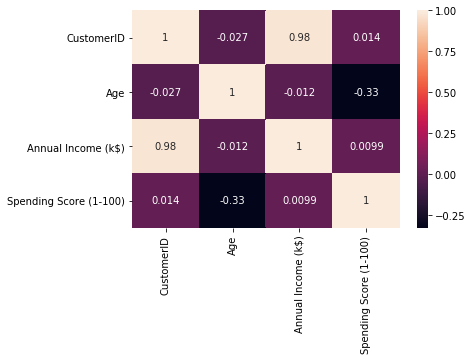

In [7]:
# importing the dataset
dataset = pd.read_csv("../input/Mall_Customers.csv")

# getting to know our data
print(dataset.head())
print(dataset.columns)
print(dataset.shape)
print(dataset.isnull().sum())
print(dataset.describe())
corr = dataset.corr()
sns.heatmap(corr, annot=True)

X = dataset.iloc[:, [3,4]].values


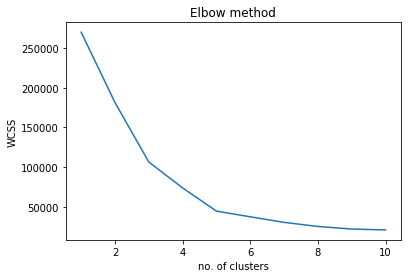

In [8]:
# using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()



     CustomerID  Gender    ...      Spending Score (1-100)  ClusterID
124         125  Female    ...                          29          0
128         129    Male    ...                          11          0
130         131    Male    ...                           9          0
134         135    Male    ...                           5          0
136         137  Female    ...                           7          0
138         139    Male    ...                          10          0
140         141  Female    ...                           5          0
144         145    Male    ...                          12          0
146         147    Male    ...                          36          0
148         149  Female    ...                          22          0
150         151    Male    ...                          17          0
152         153  Female    ...                          20          0
154         155  Female    ...                          16          0
156         157    M

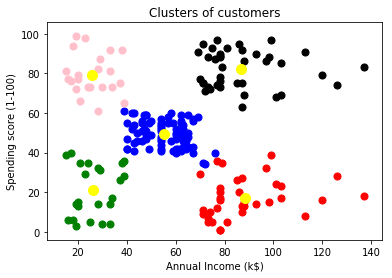

In [14]:
'''We see that the optimal number of clusters should be 5'''

# fitting K-means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

dataset['ClusterID'] = y_kmeans

cluster0 = dataset[dataset.ClusterID == 0]
print(cluster0)

# visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'black', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'pink', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'green', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

